In [1]:
import torch
import torch.nn as nn

import matplotlib.pylab as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


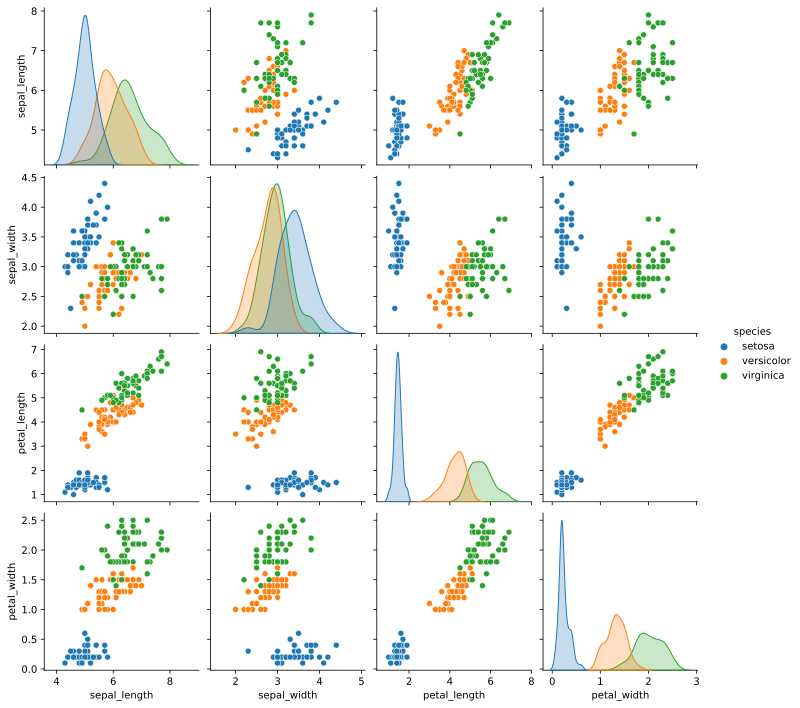

In [4]:
sns.pairplot(iris, hue='species')
plt.show()

In [33]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [32]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [36]:
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

labels = torch.zeros(len(data), dtype=torch.long)

labels[iris.species == 'setosa'] = 0
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [39]:
data.shape

torch.Size([150, 4])

In [38]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [41]:
ANN = nn.Sequential(
    nn.Linear(4, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 3)
)

lossfun = nn.CrossEntropyLoss()
# This criterion combines :class: torch.nn.LogSoftmax and :class: torch.nn.NLLLoss in one single class.
# NLLLoss : The negative log likelihood loss

optimizer = torch.optim.SGD(ANN.parameters(), lr=0.01)

In [43]:
numepochs = 1000

losses = torch.zeros(numepochs)
ongoingAcc = []

for epochi in range(numepochs):

    # forward pass
    yHat = ANN(data)

    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute accuracy
    matches = torch.argmax(yHat, axis=1) == labels # booleans (true/false)
    matchesNumaric = matches.float()               # convet to numaric
    accuracyPct = 100*torch.mean(matchesNumaric)   # calculate acc 
    ongoingAcc.append(accuracyPct)

# final forward pass
predictions = ANN(data)

predLabels = torch.argmax(predictions, axis=1)
totalAcc = 100*torch.mean((predLabels == labels).float())

In [44]:
totalAcc

tensor(98.)

Final accuracy: 98%


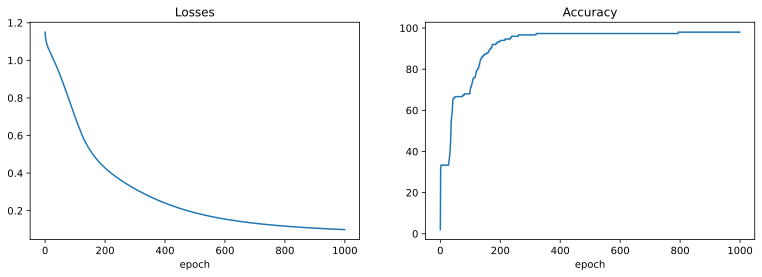

In [46]:
print( 'Final accuracy: %g%%' %totalAcc) 

fig, ax = plt.subplots (1, 2, figsize=(13, 4))

ax[0].plot(losses . detach()) 
ax[0].set_xlabel('LOSS' ) 
ax[0].set_xlabel( 'epoch' ) 
ax[0].set_title( ' Losses ' ) 

ax[1].plot(ongoingAcc) 
ax[1].set_xlabel( 'accuracy' ) 
ax[1].set_xlabel( 'epoch' ) 
ax[1].set_title( 'Accuracy' ) 
plt.show()

In [48]:
# confirm that all model predictions sum to 1, but only when converted to softmax 
sm = nn.Softmax(1)
torch.sum(sm(yHat), axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

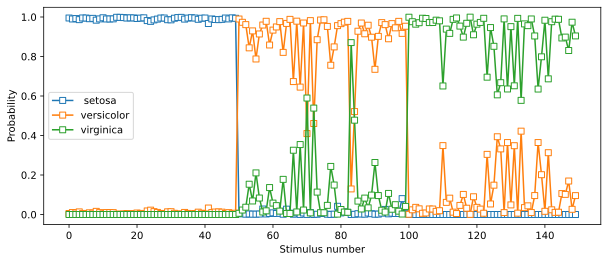

In [51]:
fig = plt.figure(figsize=(10, 4))
plt.plot(sm(yHat.detach()), 's-', markerfacecolor='w') 
plt.xlabel( 'Stimulus number' ) 
plt.ylabel( 'Probability' ) 
plt.legend([' setosa' , 'versicolor' , 'virginica' ]) 
plt.show()